## NAIVE BAYES CLASSIFIER

#### Mushroom Dataset 
Goal is to predict the class of mushrooms, given some features of the mushrooms. We will use Naive Bayes Model for this Classification
#### Load the Dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [6]:
np.unique(pd.factorize(df['cap-shape'])[0])

array([0, 1, 2, 3, 4, 5], dtype=int64)

#### Encode the Categorical Data into Numerical Data

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
##### le.fit_transform() - Fit label encoder and return encoded labels  ;  df.apply - apply a function along an axis of the dataframe

In [9]:
le = LabelEncoder()

# Applies transformation on each columns
ds = df.apply(le.fit_transform, )

In [10]:
type(ds)

pandas.core.frame.DataFrame

In [11]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [12]:
data = ds.values

print(type(data))
print(data.shape)
print(data[:5 , :])

<class 'numpy.ndarray'>
(8124, 23)
[[1 5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [1 5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [0 5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]]


In [13]:
x_data = data[: , 1:]
y_data = data[: , 0]

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.2)

In [15]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


In [16]:
np.unique(y_train)

array([0, 1])

check for scikit learn's inverse transform function which gives inverse mapping i.e get categorical data from numerical

In [18]:
df['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [19]:
le = LabelEncoder()
c = le.fit_transform(df['cap-shape'])
c

array([5, 5, 0, ..., 2, 3, 5])

In [20]:
le.inverse_transform(c)

array(['x', 'x', 'b', ..., 'f', 'k', 'x'], dtype=object)

#### BUILDING OUR CLASSIFIER !

In [21]:
a = np.array([0,5,5,1,1,1,0,1])

print(a>=1)
print(np.sum(a>=1))

[False  True  True  True  True  True False  True]
6


In [22]:
def prior_prob(y_train , label):        # prior probability
    
    total_examples = y_train.shape[0]
    class_examples = np.sum(y_train == label)
    
    return (class_examples)/float(total_examples)

In [23]:
prior_prob(a , 1)

0.5

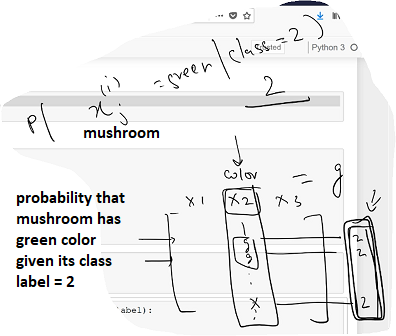

In [24]:
def cond_prob(x_train , y_train , feature_col, feature_val , label):    # conditional probability
    
    x_filtered = x_train[y_train == label]   # filter all rows in x data where y train = label (say 2)
    
    numerator = np.sum(x_filtered[:,feature_col] == feature_val)   # get those columns which have the specified feature value
    
    denominator = np.sum(y_train == label)    # get y train column with particular label (say 2)
    
    return numerator/float(denominator)

#### COMPUTE POSTERIOR PROBABILITY FOR EACH TEST SAMPLE AND MAKE PREDICTIONS

In [26]:
# we need to calculate conditional probability for each feature of testing point by iterating over it
# print(x_test[0])
# [5 3 4 1 6 1 0 1 7 0 3 2 2 7 7 0 2 1 4 2 3 5]  - feature_val

In [27]:
# given a new mushroom with n features , predict its class

def predict(x_train , y_train , x_test):
    
    classes = np.unique(y_train)         # 0 and 1
    n_features = x_train.shape[1]        # no of features
    
    post_probs = []   # List of probability for all classes and given a single testing point
    
    # Compute posterior probability for each class - likelihood*prior
    for label in classes:
        
        likelihood = 1.0
        
        # conditional probability across all features - f is feature column and x_test[f] all feature values
        for f in range(n_features):
            
            cond = cond_prob(x_train , y_train , f , x_test[f] , label)
            
            likelihood *= cond
            
        prior = prior_prob(y_train , label)
        
        # post is the probability for current class
        post = likelihood*prior
        post_probs.append(post)
            
    pred = np.argmax(post_probs)
    return pred
    #return pred , post , post_probs
 

In [28]:
output = predict(x_train , y_train , x_test[0])
output

0

In [29]:
y_test[0]

0

In [30]:
def score(x_train , y_train , x_test , y_test):
    
    pred = []     # make an array of predictions of all training samples and match it with actual y_test predictions
    
    for i in range(x_test.shape[0]):
        
        pred_label = predict(x_train , y_train , x_test[i])
        pred.append(pred_label)
        
    pred = np.array(pred)
    
    accuracy = np.sum(pred == y_test)/y_test.shape[0]    # both are vectors
    return accuracy

In [31]:
# Total number of items which are classified accurately

score(x_train , y_train , x_test , y_test)    # very good accuracy for binary classification using naive bayes

0.9981538461538462

### Gaussian Naive Bayes - Handling Continuous Valued Features

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [34]:
from sklearn.naive_bayes import GaussianNB   # work on iris dataset

In [35]:
gnb = GaussianNB()
gnb

GaussianNB()

In [36]:
# generating data

from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [37]:
x , y = make_classification(n_samples=200 , n_features=2 , n_informative=2 , n_redundant=0 , random_state=4)

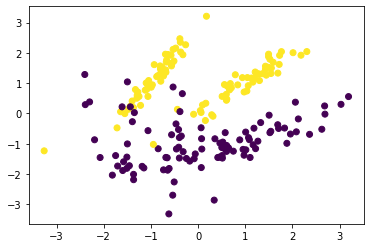

In [38]:
plt.scatter(x[ : , 0] , x[ : , 1] , c = y)
plt.show()

In [39]:
print(x.shape)
print(y.shape)
print(x[0])     # continuous value features

(200, 2)
(200,)
[-1.36748138 -2.18619146]


In [40]:
# Train our Classifier

gnb.fit(x , y)

GaussianNB()

In [41]:
gnb.score(x , y)  # Return the mean accuracy on the given test data and labels.

0.9

In [42]:
y_pred = gnb.predict(x)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1])

In [43]:
print(y)

[0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]


In [44]:
np.sum(y_pred == y)/x.shape[0]

0.9

### MNIST Classification - Multinomial Vs Gaussian Naive Bayes

In [47]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [48]:
# Load the Sklearn MNIST Dataset
digits = load_digits()

In [49]:
x = digits.data      # 8x8 image
y = digits.target

print(x.shape , '\t' , y.shape)

(1797, 64) 	 (1797,)


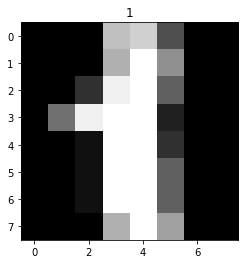

In [50]:
plt.imshow(x[1].reshape((8,8)) , cmap = 'gray')
plt.title(y[1])
plt.show()

In [51]:
x[0]   # discrete values

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

#### Train Model

In [52]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB

In [53]:
gnb = GaussianNB()

In [54]:
mnb = MultinomialNB()

In [55]:
gnb.fit(x , y)
mnb.fit(x , y)

MultinomialNB()

In [56]:
print('Gaussian NB Accuracy')
gnb.score(x , y)

Gaussian NB Accuracy


0.8580968280467446

In [57]:
print('Multinomial NB Accuracy')
mnb.score(x , y)

Multinomial NB Accuracy


0.9053978853644964

In [58]:
cross_val_score(gnb , x , y , scoring='accuracy' , cv=10).mean()

0.8113904407200497

In [59]:
cross_val_score(mnb , x , y , scoring='accuracy' , cv=10).mean()

0.8797858472998138

Since each feature is discrete valued . Hence MNB gives better results

### Importing libraries and Loading the dataset

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [55]:
data = pd.read_csv('Language Detection.csv')
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [56]:
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [57]:
data['Language'].nunique()

17

So, this dataset contains text details for 17 different languages.

In [58]:
data.shape

(10337, 2)

### Text Preprocessing and Cleaning

In [59]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [60]:
sw = set(stopwords.words())

In [61]:
import string
punc = list(string.punctuation)
sw.update(punc)
len(sw)

6287

In [62]:
corpus = []

for i in range(data.shape[0]):
    
    # Remove punctuation marks , numbers etc
    text = re.sub(r'[!@#$(),\n"%^*?:;~`0-9]' , ' ' , data['Text'][i])
    text = text.replace('[ ]' , '')
    text = text.lower()
    
    text = ' '.join(word_tokenize(text))
    corpus.append(text)

In [63]:
data['Text'][6]

'[3][4] \nThe concept of nature as a whole, the physical universe, is one of several expansions of the original notion;[1] it began with certain core applications of the word φύσις by pre-Socratic philosophers (though this word had a dynamic dimension then, especially for Heraclitus), and has steadily gained currency ever since.'

In [64]:
corpus[6]

'the concept of nature as a whole the physical universe is one of several expansions of the original notion it began with certain core applications of the word φύσις by pre-socratic philosophers though this word had a dynamic dimension then especially for heraclitus and has steadily gained currency ever since .'

### Label Encoding
- The output variable - the name of languages is a categorical variable. For training the model we need to convert it into a numerical form, so we are performing label encoding on that output variable.

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data['Language'])

In [66]:
np.unique(y , return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([ 536,  428,  546, 1385, 1014,  470,  365,   63,  698,  369,  594,
         739,  692,  819,  676,  469,  474], dtype=int64))

### Bag of Words
- As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 35000)

In [68]:
print(cv.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 35000, 'min_df': 1, 'ngram_range': (1, 1), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [69]:
X = cv.fit_transform(corpus).toarray()
print(X.shape)

(10337, 35000)


### Train Test Splitting
We preprocessed our input and output variable. The next step is to create the training set, for training the model and test set, for evaluating the test set.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(8269, 32000) (2068, 32000) (8269,) (2068,)


### Model Training using Naive Bayes Classifier and Prediction 

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
model = MultinomialNB()
model.fit(X , y)

MultinomialNB()

In [55]:
y_pred = model.predict(X_test)

### Model Evaluation

In [56]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [57]:
acc = accuracy_score(y_test , y_pred)
print("The Accuracy is: ", acc*100)

The Accuracy is:  93.56866537717602


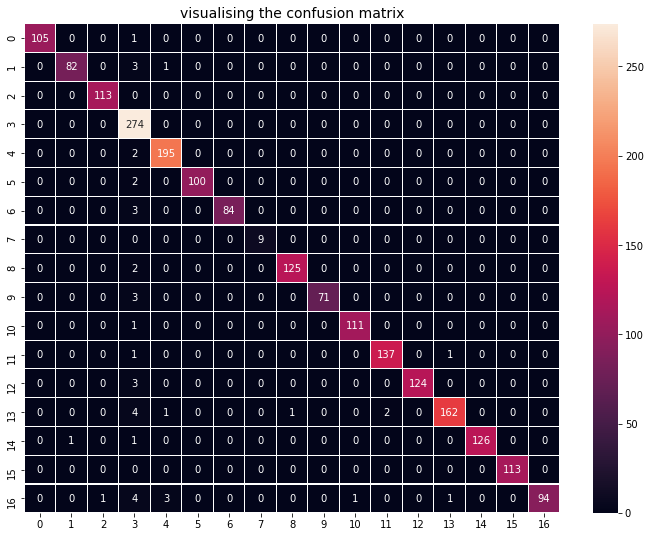

In [23]:
cm = confusion_matrix(y_test , y_pred)

plt.figure(figsize = (12, 9))
sns.heatmap(cm, annot = True , fmt = 'd' , linewidth = 0.1)
plt.title('visualising the confusion matrix' , fontsize = 14)
plt.show()

### Predicting with some more data

In [72]:
def predict(text):
    
    x = cv.transform([text]).toarray()    # converting text to bag of words model (Vector)
    lang = model.predict(x)               # predicting the language
    
    lang = le.inverse_transform(lang)     # finding the language corresponding the the predicted value
    print("The language is:" , lang[0]) 

In [73]:
# English

predict("We are using the Language Detection dataset, which contains text details for 17 different languages.")

The language is: English


In [74]:
# French

predict("fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données")

The language is: French


In [75]:
# Malayalam

predict("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

The language is: Malayalam


In [76]:
# Russian

predict("это портал знаний на базе сообщества для профессионалов в области аналитики и данных.")

The language is: Russian


In [77]:
# Hindi

predict("यह हिंदी का एक पाठ है जिसका पूर्वानुमान हमारे मॉडल द्वारा लगाया जाएगा")

The language is: Hindi


### Saving the model

In [78]:
import pickle

In [79]:
import joblib as jb

In [80]:
jb.dump(model , 'lang_det_model.pkl')

['lang_det_model.pkl']

In [87]:
jb.dump(cv , 'vectorizer.pkl')

['vectorizer.pkl']

In [81]:
model = jb.load('lang_det_model.pkl')

In [86]:
predict('This is insane')

The language is: English


In [88]:
predict('توفر George Wush بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات')

The language is: Arabic


In [90]:
predict('это портал знаний на базе сообщества для профессионалов в области аналитики и данных.')

The language is: Russian
